<a href="https://colab.research.google.com/github/rajan-dhinoja/Multiple_Disease_Prediction/blob/main/notebook_files/Liver_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Classification Template**
---



# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

print("✅ Required Libraries are Imported - Done!\n")

✅ Required Libraries are Imported - Done!



## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [3]:
# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/CLASSIFICATION/Multiple_Diseases/liver.csv'))
dataset = pd.DataFrame(pd.read_csv('../datasets/liver.csv'))
# dataset.head()
dataset.tail()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
578,60,Male,0.50,0.10,500,20,34,5.90,1.60,0.37,2
579,40,Male,0.60,0.10,98,35,31,6.00,3.20,1.10,1
580,52,Male,0.80,0.20,245,48,49,6.40,3.20,1.00,1
581,31,Male,1.30,0.50,184,29,32,6.80,3.40,1.00,1
582,38,Male,1.00,0.30,216,21,24,7.30,4.40,1.50,2


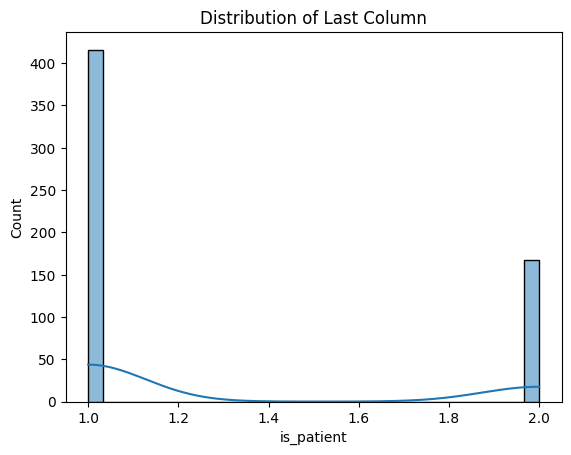

In [3]:
# plt.figure(figsize=(10, 6))
# Plot target distribution
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

In [4]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("❌ No Categorical Columns Found...")
else:
  print("✅ Categorical Columns found: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("❌ No Numerical Columns Found...")
else:
  print("✅ Numerical Columns found: \n", numerical_cols)

✅ Categorical Columns found: 
 Index(['gender'], dtype='object') 

✅ Numerical Columns found: 
 Index(['age', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins', 'albumin',
       'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')


In [5]:
print("> Shape of the Dataset: ", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
# print(dataset.describe().map(lambda x: round(x, 4)))
print(dataset.describe().to_string(header=True))

> Shape of the Dataset:  (583, 11) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None 

> Statistical summary of the Dataset:
         age  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  ag_ratio   sgpt   sgot  alkphos  is_pati

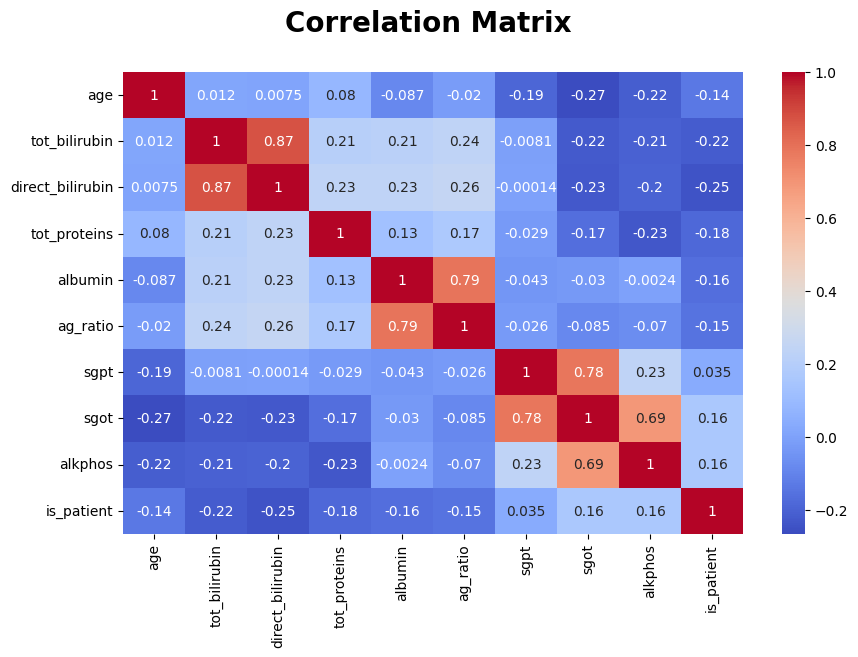

In [6]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [7]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("✅ Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("❌ No Duplicate Data(or Identical Rows) found...")

✅ Duplicate Data(or Identical Rows) found and Removed...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [8]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("⚠️ Missing Data Found! Handling them...\n")
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)
      print("\n")

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])
      print("✅ Missing Data Handled Successfully...")
      # print("New Data with replaced missing values: \n", dataset.head(10).to_string(header=True))
else:
    print("❌ No missing data found...")



⚠️ Missing Data Found! Handling them...

Missing Data Counts in Categorical Columns: 
 gender    0
dtype: int64


Missing Data Counts in Numerical Columns: 
 age                 0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64


✅ Missing Data Handled Successfully...


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [9]:
for col in dataset.columns:
  value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

  print(f"Column: \t\t'{col}'")
  print(value_counts_dataset.T.to_string(header=False), "\n")

Column: 		'age'
Unique Values:  60.00 45.00 50.00 32.00 42.00 48.00 38.00 55.00 65.00 40.00 46.00 33.00 75.00 26.00 58.00 35.00 66.00 51.00 18.00 49.00 22.00 62.00 30.00 36.00 37.00 70.00 54.00 28.00 21.00 29.00 31.00 72.00 57.00 52.00 34.00 27.00 47.00 53.00 64.00 24.00 17.00 41.00 61.00 25.00 39.00 56.00 43.00 13.00 68.00 74.00 16.00 44.00 23.00 20.00 63.00 14.00 73.00 69.00 12.00 4.00 7.00 19.00 6.00 8.00 84.00 85.00 15.00 78.00 11.00 67.00 10.00 90.00
Counts:         34.00 25.00 23.00 20.00 20.00 20.00 20.00 18.00 17.00 16.00 16.00 15.00 14.00 14.00 13.00 12.00 12.00 10.00 10.00 10.00  9.00  9.00  9.00  9.00  9.00  9.00  8.00  8.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  6.00  6.00  6.00  6.00  5.00  5.00  5.00  5.00  5.00  5.00  4.00  4.00  4.00  4.00  4.00  3.00  3.00  3.00  3.00  2.00  2.00  2.00  2.00  2.00 2.00 2.00  2.00 1.00 1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00 

Column: 		'gender'
Unique Values:   Male  Female
Counts:           430     140 

Column: 		'to

Unique Values:  198.00 215.00 298.00 190.00 195.00 182.00 180.00 145.00 165.00 218.00 158.00 282.00 202.00 188.00 206.00 205.00 230.00 192.00 162.00 168.00 310.00 196.00 290.00 189.00 186.00 175.00 152.00 159.00 185.00 160.00 178.00 208.00 194.00 170.00 214.00 171.00 210.00 272.00 201.00 285.00 140.00 163.00 258.00 482.00 350.00 224.00 142.00 220.00 275.00 750.00 191.00 238.00 146.00 265.00 239.00 245.00 300.00 358.00 315.00 174.00 176.00 173.00 216.00 289.00 380.00 157.00 268.00 279.00 292.00 199.00 137.00 332.00 110.00 200.00 250.00 236.00 209.00 135.00 100.00 1,350.00 450.00 92.00 172.00 130.00 316.00 155.00 144.00 187.00 219.00 320.00 237.00 156.00 161.00 257.00 204.00 183.00 179.00 150.00 260.00 240.00 280.00 263.00 154.00 490.00 148.00 862.00 592.00 293.00 177.00 342.00 246.00 690.00 1,750.00 212.00 181.00 1,550.00 1,100.00 166.00 554.00 509.00 326.00 650.00 115.00 621.00 256.00 418.00 271.00 231.00 558.00 331.00 555.00 542.00 105.00 102.00 149.00 580.00 610.00 719.00 309.00 686.

### Step-3.4: Checking for Stopwords and Stemming them:-

In [10]:
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer

# if categorical_cols.any():

#   nltk.download('stopwords')

#   stop_words = set(stopwords.words('english'))
#   # stop_words = stop_words.remove('not')
#   # print("\n Stop Words are: ", stop_words, "\n")
#   def stemming(text):
#       words = text.lower().split()

#       stemmer = PorterStemmer()
#       stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
#       return ' '.join(stemmed_words)  # Join stemmed words back into a string

#   # Apply the stemming function to the specified columns
#   for column in categorical_cols:
#       dataset[column] = dataset[column].astype(str).apply(stemming)

#   print("✅ Stemming Completed Successfully... \n")
#   # print(dataset.head().to_string(header=True))
# else:
#   print("❌ No Stemming Needed...")

### Step-3.5: Checking any Categorical Data and Encoding them:-

In [11]:
# Check for binary and multi-value categorical columns#+

cols_for_encoding = []

for col in dataset.columns:
    unique_values = dataset[col].unique()
    if 2 <= len(unique_values) < 18:
        cols_for_encoding.append(col)
        print(f"> '{col}' column with unique values: \t{unique_values}")

print("\n")
print(f" '{len(cols_for_encoding)}' Columns Found: \n\t {cols_for_encoding}")


> 'gender' column with unique values: 	['Female' 'Male']
> 'is_patient' column with unique values: 	[1 2]


 '2' Columns Found: 
	 ['gender', 'is_patient']


In [12]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
# LabelEncode binary columns
for col in cols_for_encoding:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    encoders[col] = le  # Store encoder for later use
    print(f"✅ '{col}' has been encoded Successfully...\n")

X = dataset.drop(columns=['is_patient'])
y = dataset['is_patient']

print("Matrix of Features(X): \n", pd.DataFrame(X).head().to_string(header=True), "\n")
print("Dependent Variable(y): \n", pd.DataFrame(y).head().to_string(header=True))


✅ 'gender' has been encoded Successfully...

✅ 'is_patient' has been encoded Successfully...

Matrix of Features(X): 
     age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  ag_ratio  sgpt  sgot  alkphos
0 65.00       0           0.70              0.10        187.00    16.00     18.00  6.80  3.30     0.90
1 62.00       1          10.90              5.50        699.00    64.00    100.00  7.50  3.20     0.74
2 62.00       1           7.30              4.10        490.00    60.00     68.00  7.00  3.30     0.89
3 58.00       1           1.00              0.40        182.00    14.00     20.00  6.80  3.40     1.00
4 72.00       1           3.90              2.00        195.00    27.00     59.00  7.30  2.40     0.40 

Dependent Variable(y): 
    is_patient
0           0
1           0
2           0
3           0
4           0


## Step-4: Split the Dataset into the Training set and Test set:-

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Splitted Successfully...\n")

# print("Printing Training Sets: ")
# print("> X_train: \n", (pd.DataFrame(X_train).head()).to_string(), "\n")
# print("> X_test: \n", (pd.DataFrame(X_test).head()).to_string(), "\n")
# print("\n")
# print("Printing Test Sets: ")
# print("> y_train: \n", (pd.DataFrame(y_train).head()).to_string(header=False), "\n")
# print("> y_test: \n", (pd.DataFrame(y_test).head()).to_string(header=False), "\n")

✅ Data Splitted Successfully...



## Step-5: Feature Scaling:-

In [14]:
import joblib
from sklearn.preprocessing import StandardScaler

# Scaling Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, '../saved_models/liver_disease_scaler.pkl')
print("✅ scaler have been saved Successfully...\n")

print("✅ Feature Scaling is Done Successfully...\n")
# print("Printing Training Sets after Feature Scaling:")
# print("> X_train: \n", X_train)
# print("\n")
# print("Printing Test Sets after Feature Scaling:")
# print("> X_test: \n", X_test)

✅ scaler have been saved Successfully...

✅ Feature Scaling is Done Successfully...



# ***Step-B: Model Builing & Evaluation...***

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

models = {
  RandomForestClassifier(n_estimators=100, random_state=42),
}

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # cv_score = cross_val_score(model, X_train, y_train, cv=5)
  print(f"✅ {model.__class__.__name__} is trained Sucessfully...")
  print(f"-> {model.__class__.__name__}:-")
  print(f"  Accuracy: \t {accuracy_score(y_test, y_pred):.2f}")
  print(f"  Precision: \t {precision_score(y_test, y_pred):.2f}")
  print(f"  Recall: \t\t {recall_score(y_test, y_pred):.2f}")
  print(f"  F1 Score: \t {f1_score(y_test, y_pred):.2f}")
  print(f"  ROC-AUC Score: {roc_auc_score(y_test, y_pred):.2f}\n")
  print("\n")


✅ RandomForestClassifier is trained Sucessfully...
-> RandomForestClassifier:-
  Accuracy: 	 0.75
  Precision: 	 0.52
  Recall: 		 0.38
  F1 Score: 	 0.44
  ROC-AUC Score: 0.63





# ***Step-C: Saving the Model & Testing It...***

## Step-1: Saving the Model(.sav):-

In [16]:
import joblib

joblib.dump(model, f'../saved_models/LIVER_Disease_Prediction_Model.pkl')
print(f"✅ Model saved: LIVER_Disease_Prediction_Model.pkl")

✅ Model saved: LIVER_Disease_Prediction_Model.pkl


## Step-2: Predicting and Testing the Model:-

In [17]:
# correct_predictions = 0
# max_correct_predictions = 0
# model_predictions = {} # dictionary to store model and their correct predictions

# random_value = np.random.randint(3, 5)
# print("Number of Inputs for Predction: ", random_value, "\n")

# for i in range(random_value):
#   sample_input = pd.DataFrame(X_train).iloc[i].values.reshape(1, -1)  # Convert a row to an array
#   sample_output = round(y_train.iloc[i], 2)

#   print("Before Predicting, Sample Data & Output Sales are:-")
#   print("> Sample Data: ", sample_input)
#   print("> Output: ",sample_output, "\n")

#   model = joblib.load(f"../saved_models/LIVER_Disease_Prediction_Model.pkl")
#   prediction = model.predict(sample_input)
#   rounded_prediction = round(prediction[0], 2)
#   print(f" - Predicted Sales: {rounded_prediction:.2f}")

#   if rounded_prediction == sample_output:
#       correct_predictions += 1
#       print("\t✅ Nice Work! your Prediction is correct...\n")
#       # increment correct prediction count for the model in the dictionary
#       model_predictions[model.__class__.__name__] = model_predictions.get(model.__class__.__name__, 0) + 1
#   else:
#       print("\t❌ Oops! your Prediction is incorrect...\n")

#   print("="*75, "\n")

In [18]:
# # Instead of using max, we'll iterate and check for at least one correct prediction
# models_with_correct_predictions = []  # List to store models with at least one correct prediction

# for model_name, correct_count in model_predictions.items():
#     if correct_count >= 1:  # Check for at least one correct prediction
#         models_with_correct_predictions.append(model_name)

# # Print the results
# if models_with_correct_predictions:
#     for model_name in models_with_correct_predictions:
#         print(f"- ✅ '{model_name}' has achieved:\n\t\t\t '{model_predictions[model_name]}' out of {random_value} correct predictions")
# else:
#     print("No models achieved any correct predictions on the samples.")

## Step-3: Predicting the Result from saved Model:-

In [19]:
# random_input = np.random.randint(1, 50)
# print(f"Row '{random_input}' for Predction: \n")

# input_data = pd.DataFrame(X).iloc[random_input]  # Convert a row to an array
# # changing input data to a numpy arrayṅṅ
# input_data_as_array = np.asarray(input_data).reshape(1,-1)

# feature_names = pd.DataFrame(X).columns  # Get the feature names (column names)
# # feature_names = pd.DataFrame(X).columns.astype(str)

# # Create a dictionary of feature names and values for the selected row
# input_data_dict = dict(zip(feature_names, input_data.values))
# max_feature_name_length = max(len(name) for name in feature_names)

# for feature_name, value in input_data_dict.items():
#     print(f"{feature_name:{max_feature_name_length}} = \t{value}")  # Alignment using string formatting
# print("\n")  # Add a newline for better readability

# model = pickle.load(open(f"RandomForestClassifier.sav", "rb"))

# prediction = model.predict(input_data_as_array)
# print(f"{'Outcome_Prediction':{max_feature_name_length}} = \t{prediction[0]}", "\n")  # Alignment for prediction

# if (prediction[0] == 0):
#   print("😃 Yeah! The Person does not have Liver Disease...")

# else:
#   print("⚠️ Oops! The Person has a Liver Disease...")